# Plotting cumulative sum graphs

### Data are adjusted to begin in January instead of October

1) Counts of activated pixels (3.75x3.75km) are calculated for each grid (80x80km) at each hour

2) These counts are resampled by each 12z-12z day and summed--then, thresholded by 1

- In other words, did at least one pixel activate within that grid during the period? 1 if so, 0 if no.

3) The grids associated with each sub region are extracted, and the mean daily count is calculated within the region (i.e., maximum of 1 if all grids are active)

4) The daily dates are then normalized to have the same year

5) The cumulative daily sum of mean regional grid day counts are calculated, as well as the mean, 25th, and 75th percentile for each of the 15 years at each day of the year

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set up plot

In [2]:
import pandas as pd
import numpy as np
import string
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

letters = string.ascii_lowercase

plt.rcParams['figure.figsize'] = 20,25
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

meanpointprops = dict(marker='.', markeredgecolor='black',
                      markerfacecolor='black')

colors = {'HIST': '#c7e9c0', 
          'FUTR 4.5': '#6baed6', 
          'FUTR 8.5': '#a50f15'}

data_lims = {40:(0, 50), 
             50:(0, 34), 
             60:(0, 14)}

full_name = {'ama':'Amarillo, TX', 
             'mph': 'Memphis, TN', 
             'mnp': 'Minneapolis, MN', 
             'econus': 'ECONUS'}

season_convert = {12: 'DJF', 1: 'DJF', 2: 'DJF', 
                  3: 'MAM', 4: 'MAM', 5: 'MAM', 
                  6: 'JJA', 7: 'JJA', 8: 'JJA', 
                  9: 'SON', 10: 'SON', 11: 'SON'} 

label_props = dict(boxstyle='round', facecolor='w', alpha=1)

# Plot the data

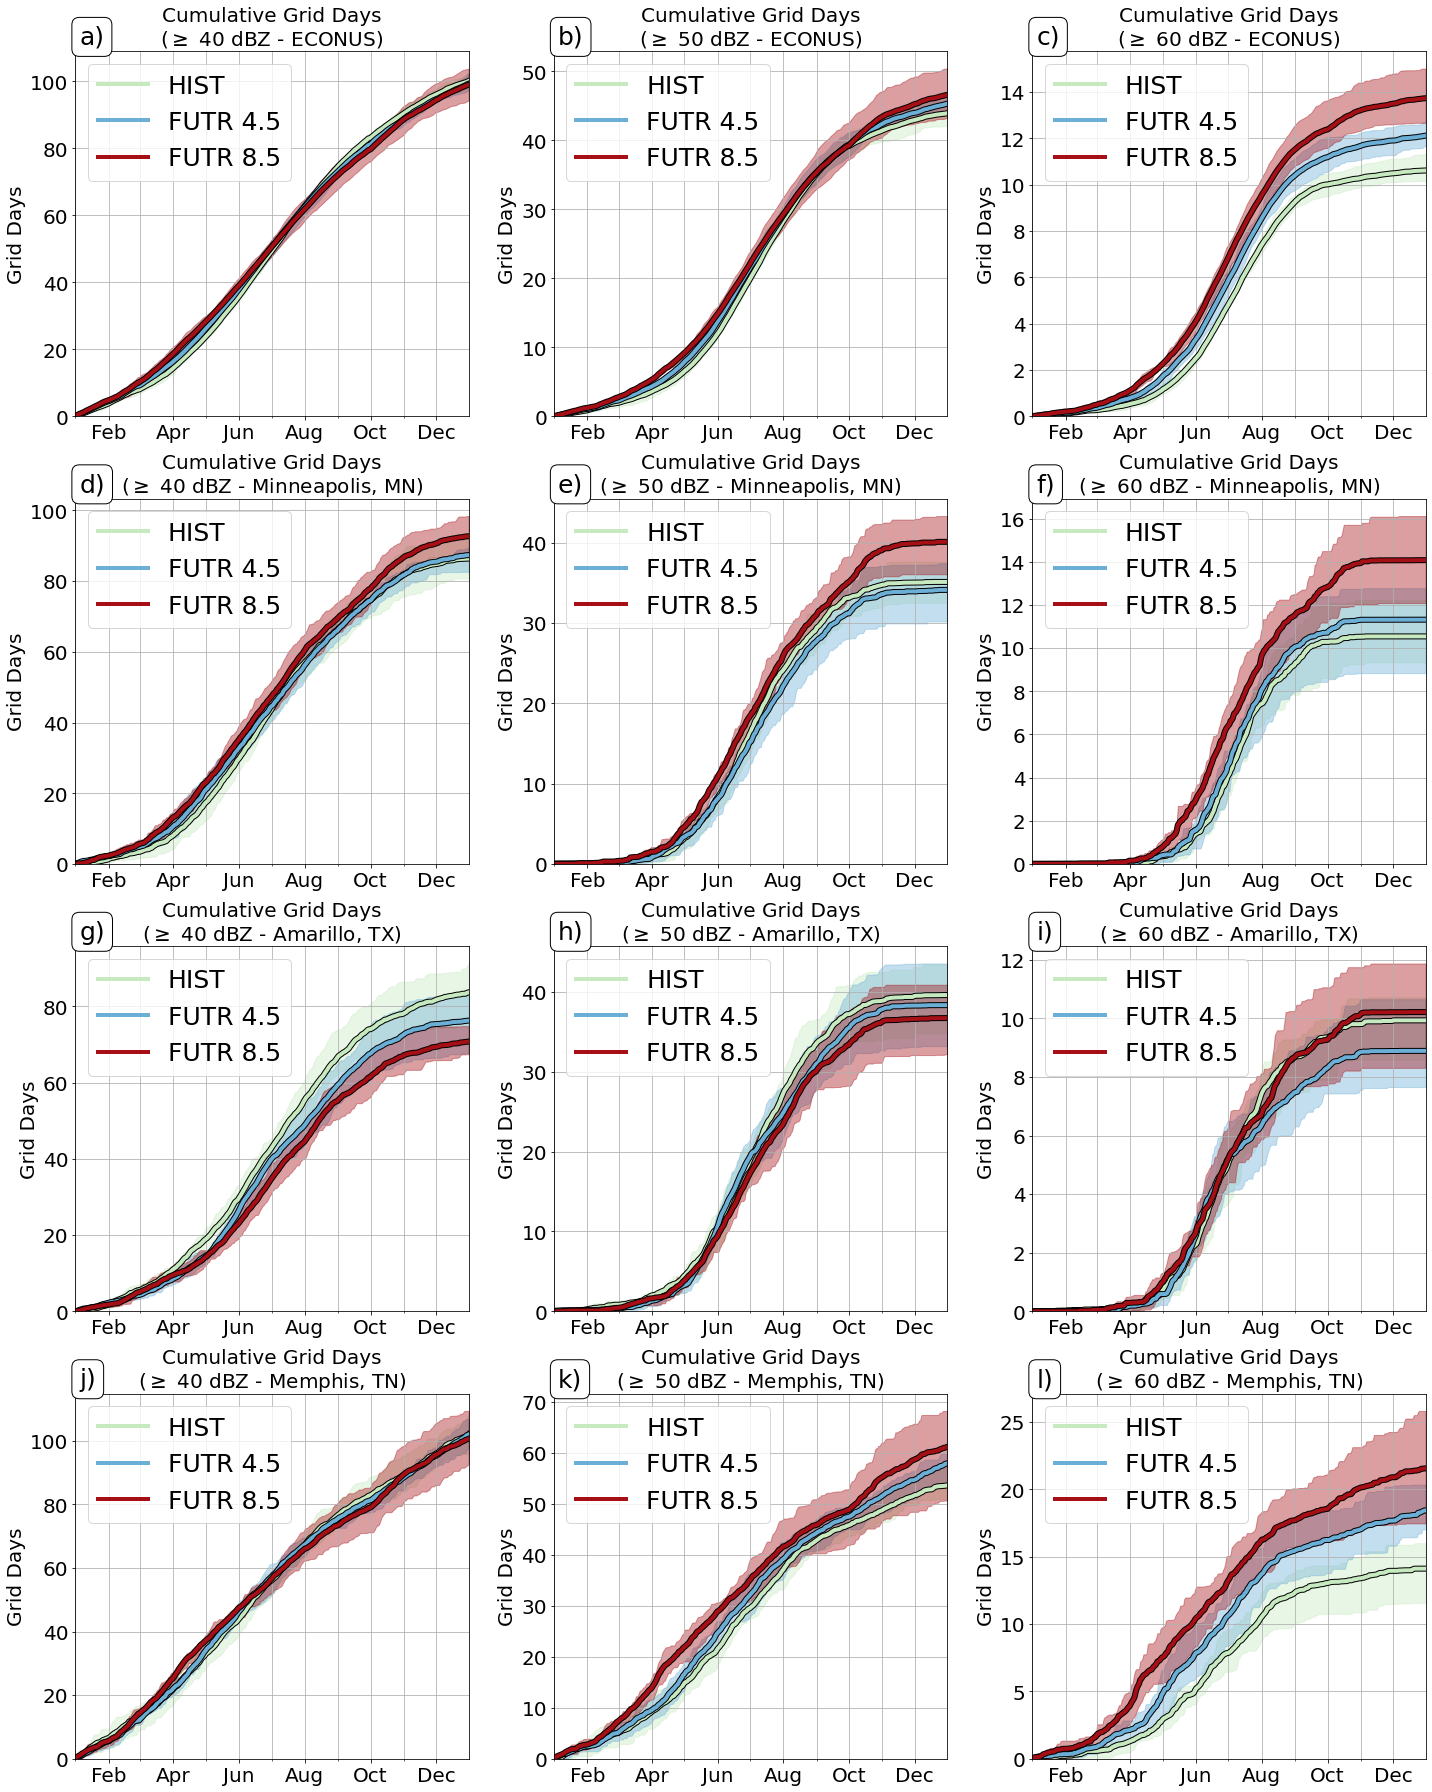

In [3]:
figure_number = 1

prefix = "../data/cumul"

for region_name in ['econus', 'mnp', 'ama', 'mph']:
    
    for i, dbz in enumerate(range(40, 70, 10)):
        
        ax = plt.subplot(4, 3, figure_number)
        
        ax.set_title(f"Cumulative Grid Days\n($\geq$ {dbz} dBZ - {full_name[region_name]})", size=20)
        
        ax.annotate("{})".format(letters[figure_number-1]), (0.01, 1.02), xycoords='axes fraction',
                    fontsize=25, bbox=label_props, color='k', zorder=25)
        
        ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_locator(mdates.MonthLocator([2, 4, 6, 8, 10, 12]))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

        ax.grid(which='both')
        ax.set_ylabel("Grid Days")

        hist_ = pd.read_csv(f"{prefix}/{region_name}_historical_{dbz}_cumu_dbz_days.csv", index_col=0, parse_dates=True)
        rcp45_ = pd.read_csv(f"{prefix}/{region_name}_future_4p5_{dbz}_cumu_dbz_days.csv", index_col=0, parse_dates=True)
        rcp85_ = pd.read_csv(f"{prefix}/{region_name}_future_8p5_{dbz}_cumu_dbz_days.csv", index_col=0, parse_dates=True)

        for sim, name in zip([hist_, rcp45_, rcp85_], ['HIST', 'FUTR 4.5', 'FUTR 8.5']):

            ax.plot(hist_.index, sim['mean'], color='k', lw=6)
            ax.plot(hist_.index, sim['mean'], '-', color=colors[name], lw=4, label=name)
            ax.fill_between(hist_.index, color=colors[name], alpha=0.4, y1=sim['p25'], y2=sim['p75'])
        
        ax.legend(prop={"size":25})
        ax.set_xlim(hist_.index.values[0], hist_.index.values[-1])
        ax.set_ylim(0, 1.05*np.max([rcp85_['p75'].values[-1], rcp45_['p75'].values[-1], hist_['p75'].values[-1]]))
        
        figure_number += 1

plt.tight_layout()

plt.savefig("../figures/fig2.pdf", bbox_inches='tight', dpi=300) 